In [1]:
import numpy as np
import matplotlib.pyplot as plt
import MHSampler
%matplotlib inline

Initiate a Markov chain with initial position 10. The chain can later be written to 'output/file.txt'.

In [2]:
mc = MHSampler.markov_chain(10., 'output/file.txt')

Iterate the Markov chain 10000 times. This currently assumes a symmetric Gaussian prposal function and is exploring a Gaussian likelihood. 

In [25]:
np.random.seed(1234)
for i in range(10000000):
    MHSampler.step(mc)

Now compare the analytical simple Gaussian with the sampled posterior. We see that using just the first ten thousand samples provides a poor approximation. Increasing to one million gives a better estimate, and increasing past that gives only a very small adjustment. 

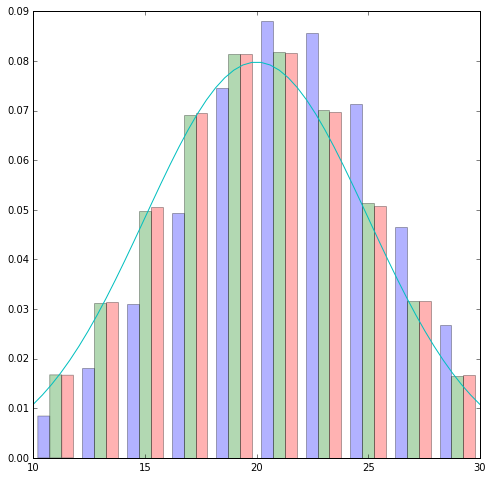

In [27]:
fig = plt.figure(figsize = (8, 8))
theta = np.linspace(10., 30.)
plt.hist((mc.chain[0:10000], mc.chain[0:1000000], mc.chain[0:10000000]), range = [10., 30.], normed = True, alpha = .3)
#plt.hist(mc.chain, color = 'r', range = [10., 30.], normed = True, alpha = .3)
plt.plot(theta, MHSampler.likelihood(theta))
plt.show()